# Preprocessing Kecelakaan

Anggota:
- Ahmad Danindra Nugroho (5025211259)
- Muhammad Ghifari Taqiuddin (5025211063)
- Raihan Farid (5025201141)
- Talitha Hayyinas Sahala (5025211263)

# Preparations

In [ ]:
# Installing dependencies
# Only run once
%pip install gnews nlp-id PySastrawi pillow matplotlib numpy wordcloud pandas

In [1]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os

In [2]:
# Directory for all related files
dataset_dir = '../dataset/'
os.makedirs(dataset_dir, exist_ok=True)

In [3]:
os.listdir(dataset_dir)

['Gempa Bumi-2018-2023.csv',
 'Kebakaran-2018-2023.csv',
 'Banjir-2018-2023.csv',
 'Kecelakaan-2018-2023.csv']

## Loading Dataset

In [4]:
df = pd.read_csv(os.path.join(dataset_dir, 'Kecelakaan-2018-2023.csv'))
df = df.drop(columns=['description' , 'url', 'publisher'])
df['title'] = df['title'].apply(lambda x: x.split(' - ')[0])
df = df[['published date', 'title']]
print(df.shape)
df.head()

(7200, 2)


,published date,title
0,2018-01-01 08:00:00+00:00,CEO Inggris turut tewas dalam kecelakaan pesaw...
1,2018-01-01 08:00:00+00:00,Benarkah Bulan Purnama dan Supermoon Sebabkan ...
2,2018-01-01 08:00:00+00:00,"Kecelakaan di Indrapuri, Korban Mahasiswi Asal..."
3,2018-01-01 08:00:00+00:00,Menguak Alasan Wanita Lebih Rentan Kecelakaan ...
4,2018-01-01 08:00:00+00:00,Dua belas orang tewas dalam kecelakaan pesawat...


## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [5]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,published date,title
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal..."
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...


In [6]:
# 2. Stemming
# Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,published date,title,stem
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...,ceo inggris turut tewas dalam celaka pesawat s...
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...,benar bulan purnama dan supermoon sebab celaka
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal...",celaka di indrapuri korban mahasiswi asal aceh...
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...,uak alas wanita lebih rentan celaka saat kemudi
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...,dua belas orang tewas dalam celaka pesawat di ...


In [7]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

# df['tokens'] = df['stem'].apply(tok.tokenize)
df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,published date,title,stem,tokens
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...,ceo inggris turut tewas dalam celaka pesawat s...,"[ceo, inggris, turut, tewas, dalam, celaka, pe..."
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...,benar bulan purnama dan supermoon sebab celaka,"[benar, bulan, purnama, dan, supermoon, sebab,..."
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal...",celaka di indrapuri korban mahasiswi asal aceh...,"[celaka, di, indrapuri, korban, mahasiswi, asa..."
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...,uak alas wanita lebih rentan celaka saat kemudi,"[uak, alas, wanita, lebih, rentan, celaka, saa..."
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...,dua belas orang tewas dalam celaka pesawat di ...,"[dua, belas, orang, tewas, dalam, celaka, pesa..."


In [8]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,published date,title,stem,tokens,tokens_clean
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...,ceo inggris turut tewas dalam celaka pesawat s...,"[ceo, inggris, turut, tewas, dalam, celaka, pe...","[ceo, inggris, tewas, celaka, pesawat, sydney]"
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...,benar bulan purnama dan supermoon sebab celaka,"[benar, bulan, purnama, dan, supermoon, sebab,...","[purnama, supermoon, celaka]"
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal...",celaka di indrapuri korban mahasiswi asal aceh...,"[celaka, di, indrapuri, korban, mahasiswi, asa...","[celaka, indrapuri, korban, mahasiswi, aceh, t..."
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...,uak alas wanita lebih rentan celaka saat kemudi,"[uak, alas, wanita, lebih, rentan, celaka, saa...","[uak, alas, wanita, rentan, celaka, kemudi]"
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...,dua belas orang tewas dalam celaka pesawat di ...,"[dua, belas, orang, tewas, dalam, celaka, pesa...","[belas, orang, tewas, celaka, pesawat, kosta, ..."


In [9]:
# Gabungkan kembali token pada kolom 'tokens_clean'
df['merged'] = df['tokens_clean'].apply(lambda token: ' '.join(token))
df.head()

,published date,title,stem,tokens,tokens_clean,merged
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...,ceo inggris turut tewas dalam celaka pesawat s...,"[ceo, inggris, turut, tewas, dalam, celaka, pe...","[ceo, inggris, tewas, celaka, pesawat, sydney]",ceo inggris tewas celaka pesawat sydney
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...,benar bulan purnama dan supermoon sebab celaka,"[benar, bulan, purnama, dan, supermoon, sebab,...","[purnama, supermoon, celaka]",purnama supermoon celaka
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal...",celaka di indrapuri korban mahasiswi asal aceh...,"[celaka, di, indrapuri, korban, mahasiswi, asa...","[celaka, indrapuri, korban, mahasiswi, aceh, t...",celaka indrapuri korban mahasiswi aceh tamiang...
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...,uak alas wanita lebih rentan celaka saat kemudi,"[uak, alas, wanita, lebih, rentan, celaka, saa...","[uak, alas, wanita, rentan, celaka, kemudi]",uak alas wanita rentan celaka kemudi
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...,dua belas orang tewas dalam celaka pesawat di ...,"[dua, belas, orang, tewas, dalam, celaka, pesa...","[belas, orang, tewas, celaka, pesawat, kosta, ...",belas orang tewas celaka pesawat kosta rika


## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

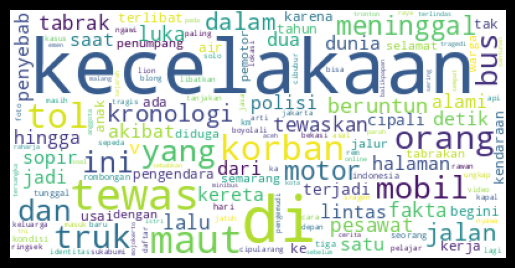

In [10]:
text_before = ' '.join(df['title'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

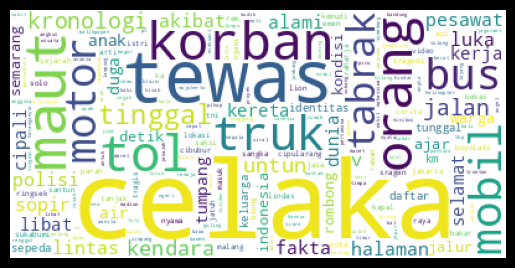

In [11]:
text_after = ' '.join(df['merged'])
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

In [12]:
# Simpan output ke dalam CSV
df.to_csv('Kecelakaan-2018-2023-pre.csv', index=False)